In [7]:

#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Cargamos la data y se apunta  con la variable titanic

titanic = pd.read_csv('Titanic-Dataset.csv')


In [8]:
#  lectura de los Datos para el Análisis exploratorio

titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [11]:
#Limpiar la data del dataset, porque tipo de dato de acuerdo al sexo. 0 masculino y 1 femenino y provoca errores de casteo

titanic['Sex'] = titanic ['Sex'].replace({'male': 0, 'female':1}) 
#verificamos
titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",0,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",0,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",1,34.0,0,1,231919,23.0000,NaN,S


In [12]:
# Ver contenido y descripcion de los datos

titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Pudieramos solo dejar algunas columnas titanic.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

Text(0.5, 1.0, 'Datos Atípicos Pclass')

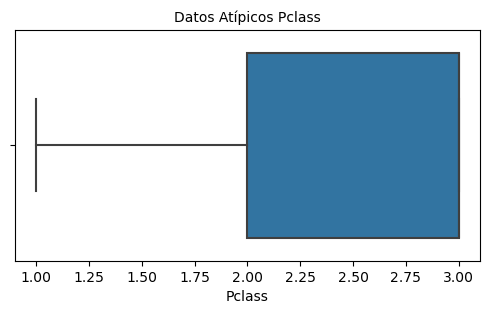

In [23]:
#Ver Datos  Atípicos para la columna Pclass

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Pclass'])
plt.title('Datos Atípicos Pclass', fontsize=10 )

Text(0.5, 1.0, 'Datos Atípicos Age')

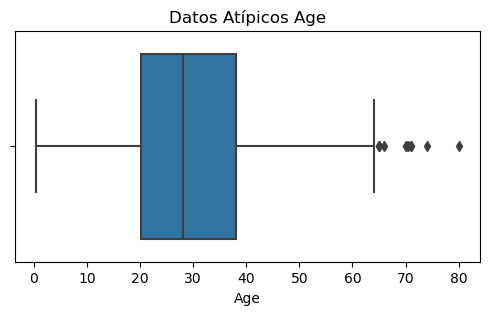

In [24]:
#Ver Datos  Atípicos para la columna Age

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['Age'])
plt.title('Datos Atípicos Age', fontsize=12 )

Text(0.5, 1.0, 'Datos Atípicos SibSp')

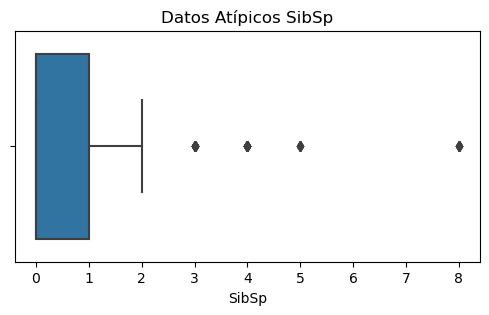

In [22]:
#Identificación de Datos Faltantes y Atípicos "SibSp"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['SibSp'])
plt.title('Datos Atípicos SibSp', fontsize=12 )

In [26]:
# Verificar si Datos faltantes

print("Cero en Pclass: ",titanic['Pclass'].isin([0]).sum())
print("Cero en Age: ",titanic['Age'].isin([0]).sum())

Cero en Pclass:  0
Cero en Age:  0


In [27]:
# Por consistencia para la data updatear promedio y actualizar columna.

titanic['Pclass']=titanic['Pclass'].replace(0,titanic['Pclass'].mean())
titanic['Age']=titanic['Age'].replace(0,titanic['Age'].mean())

In [28]:
print("Verificando Registros con cero en Pclass: ",titanic['Pclass'].isin([0]).sum())
print("Verificando Registros con cero en Age: ",titanic['Age'].isin([0]).sum())

Verificando Registros con cero en Pclass:  0
Verificando Registros con cero en Age:  0


Text(0.5, 1.0, 'Sisbp')

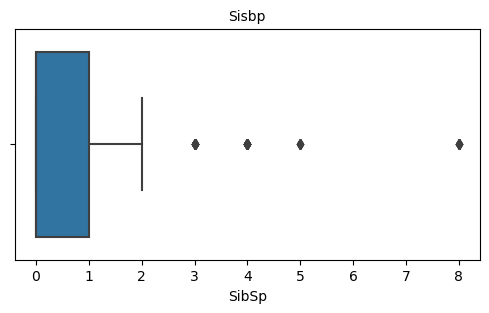

In [31]:
# Datos Faltantes y Atípicos "SibSp"

plt.figure(figsize=(6, 3))
sns.boxplot(x=titanic['SibSp'])
plt.title('Sisbp', fontsize=10 )


In [51]:
# Atípicos "Clase de billete"
Atipicos=((titanic['Pclass']<1)|(titanic['Pclass']>3)).sum()
print("sumatoria Clase entre 1 y 3 =  {}".format(Total_Atipicos))


sumatoria Clase =  7


In [53]:
#Conteo de Datos Atípicosde la edad entre 50 y 100 años
Total_At=((titanic['Age']<50 )|(titanic['Age']>100)).sum()
print("atípicos de Edad entre 50-100 = {}".format(Total_At))

atípicos de Edad entre 50-100 = 640


In [55]:
# Filtra Datos Atípicos "Clase de Billete"

titanic=titanic[(titanic['Pclass']<3)&(titanic['Pclass']>1)]

# Filtra Datos Atípicos Edad

titanic=titanic[(titanic['Age']<100)&(titanic['Age']>50)]

In [57]:
# Vericar que no exitan nnulos
titanic.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 15 to 774
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  15 non-null     int64  
 1   Survived     15 non-null     int64  
 2   Pclass       15 non-null     int64  
 3   Name         15 non-null     object 
 4   Sex          15 non-null     int64  
 5   Age          15 non-null     float64
 6   SibSp        15 non-null     int64  
 7   Parch        15 non-null     int64  
 8   Ticket       15 non-null     object 
 9   Fare         15 non-null     float64
 10  Cabin        1 non-null      object 
 11  Embarked     15 non-null     object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1.5+ KB


In [59]:
#query contar una variable ej. Sobreviviente
titanic['Survived'].value_counts()

Survived
0    12
1     3
Name: count, dtype: int64

In [60]:
titanic[['Survived']].head(40)

,Survived
15,1
33,0
150,0
232,0
249,0
317,0
570,1
582,0
626,0
672,0


In [61]:
# definimos a motu propia datos para  train 70% , y para test de  30%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = titanic.drop('Survived',axis=1) # Porque se debem cargar datos de entrenamiento sin los datos de la columna Condicion 
Y = titanic['Survived'] # Porque se debem cargar datos de entrenamiento con los datos de la la columna Condicion 


In [63]:
#bloques de entrenamiento y de test (crear)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [64]:
print (X_train)

     PassengerId  Pclass                                   Name  Sex   Age  \
684          685       2      Brown, Mr. Thomas William Solomon    0  60.0   
317          318       2                   Moraweck, Dr. Ernest    0  54.0   
714          715       2                  Greenberg, Mr. Samuel    0  52.0   
232          233       2              Sjostedt, Mr. Ernst Adolf    0  59.0   
570          571       2                     Harris, Mr. George    0  62.0   
626          627       2         Kirkland, Rev. Charles Leonard    0  57.0   
695          696       2             Chapman, Mr. Charles Henry    0  52.0   
672          673       2            Mitchell, Mr. Henry Michael    0  70.0   
150          151       2             Bateman, Rev. Robert James    0  51.0   
772          773       2                      Mack, Mrs. (Mary)    1  57.0   
774          775       2  Hocking, Mrs. Elizabeth (Eliza Needs)    1  54.0   

     SibSp  Parch       Ticket    Fare Cabin Embarked  
684    

In [65]:
print (Y_train)

684    0
317    0
714    0
232    0
570    1
626    0
695    0
672    0
150    0
772    0
774    1
Name: Survived, dtype: int64


In [99]:
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

ValueError: could not convert string to float: 'Brown, Mr. Thomas William Solomon'

In [ ]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.